<a href="https://colab.research.google.com/github/Kalidsa/sbbd-2025-apps_reviews/blob/main/SBBD_2025_apps_reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers torch


In [ ]:
!pip install nlpaug
!pip install emoji
!pip install num2words

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 4.9 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=71137576072944ed8f3e3a757108038fd25fe88b46f28b25dbc4b0ada08668e6
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


In [ ]:
!pip uninstall -y torch
!pip install torch==2.6.0+cu124 torchvision==0.21.0+cu124 torchaudio==2.6.0+cu124 --index-url https://download.pytorch.org/whl/cu124


Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Looking in indexes: https://download.pytorch.org/whl/cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 768.5/768.5 MB 1.6 MB/s eta 0:00:00


In [ ]:
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) 
Token is valid (permission: fineGrained).
The token `pessoal` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate w

In [ ]:
import pandas as pd
import regex
import unicodedata
from num2words import num2words
import emoji

df_original = pd.read_csv('/content/drive/MyDrive/sbbd/apps_reviews.csv', sep=',')


def traduzir_emojis(texto):
    return emoji.demojize(texto, language='pt')

def remover_acentos(texto):
    texto = unicodedata.normalize('NFD', texto)
    texto = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
    return texto

def numero_para_palavra(texto):
    def substituir_numeros(palavra):
        numeros_encontrados = regex.findall(r'\d+', palavra)
        for numero in numeros_encontrados:
            try:
                extenso = num2words(int(numero), lang='pt')
                palavra = palavra.replace(numero, extenso)
            except:
                pass
        return palavra


    palavras_processadas = [substituir_numeros(p) for p in texto.split()]
    return ' '.join(palavras_processadas)

def preprocess(texto):
    texto = traduzir_emojis(texto)
    texto = remover_acentos(texto)
    texto = texto.replace(":", " ")
    texto = texto.replace("_", " ")
    texto = regex.sub(r'[^\p{Latin} :_]', ' ', texto)
    texto = regex.sub(r'(.)\1{2,}', r'\1', texto)
    texto = texto.lower()
    texto = regex.sub(r'\s+', ' ', texto).strip()
    texto = numero_para_palavra(texto)
    return texto



In [ ]:
df_original['content_traduzido'] = df_original['content'].astype(str)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(traduzir_emojis)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(remover_acentos)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(preprocess)

print(df_original.head())

                               reviewId app_name  \
0  01e23c15-44bf-46b7-b280-40e880d9d49b   Shopee   
1  df40ba7c-075d-48dc-b798-21466dfb41d6   Shopee   
2  59490b23-b17b-4bba-855b-b5053dadc0db   Shopee   
3  48fd8168-1e42-4475-9a99-935c2fd48769   Shopee   
4  f4e1468b-6d97-4f1a-927d-1afee2bfbe75   Shopee   

                                             content sentiment_polarity  \
0  O app da Shopee é razoável. Apesar de ser fáci...           positive   
1  O app é bem otimizado, fácil de visualizar os ...           positive   
2  O app é muito bom, prático e fácil de entender...           positive   
3  Aplicativo muito bom. Mas algo que me chateou ...           positive   
4  o app é muito bom, porém tenho tido dificuldad...           negative   

  sentiment Unnamed: 5                                  content_traduzido  
0   sadness        NaN  o app da shopee e razoavel apesar de ser facil...  
1   sadness        NaN  o app e bem otimizado facil de visualizar os p...  
2   sadn

In [ ]:
!pip install nlp
!python -m spacy download pt_core_news_sm
import spacy
nlp = spacy.load('pt_core_news_sm')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 123.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import psutil
import os
import time
import torch
import random
from transformers import BertForMaskedLM, BertTokenizer
import pandas as pd
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk
from transformers import GPT2LMHeadModel, GPT2Tokenizer


nltk.download('omw-1.4')
nltk.download('wordnet')
nlp = spacy.load("pt_core_news_sm")

process = psutil.Process(os.getpid())
start_time = time.time()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

if device == 'cuda':
      torch.backends.cudnn.benchmark = True

gpt2_model_name = "pierreguillou/gpt2-small-portuguese"
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_model_name)
special_tokens = [ "<|happiness|>", "<|sadness|>", "<|anger|>", "<|fear|>", "<|disgust|>", "<|surprise|>", "<|neutral|>" ]
gpt2_tokenizer.add_special_tokens({"additional_special_tokens": special_tokens})

gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_model_name)
gpt2_model.resize_token_embeddings(len(gpt2_tokenizer))
gpt2_model.eval()
gpt2_model.to(device)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/850k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/508k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/510M [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50264, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50264, bias=False)
)

In [ ]:
def count_by_sentiment(df):
    return df.groupby('sentiment').size().reindex(target_sentiments, fill_value=0)

def apply_similarity_filter(df_aug, df_original, threshold=0.92):
    from sentence_transformers import util, SentenceTransformer
    from tqdm import tqdm

    if df_aug.empty:
        return df_aug

    model = SentenceTransformer('sentence-transformers/LaBSE')
    embeddings_aug = model.encode(df_aug["content_traduzido"].tolist(), convert_to_tensor=True)
    embeddings_original = model.encode(df_original["content_traduzido"].tolist(), convert_to_tensor=True)

    cos_sim_aug_to_original = util.cos_sim(embeddings_aug, embeddings_original)
    cos_sim_aug_to_aug = util.cos_sim(embeddings_aug, embeddings_aug)

    indices_to_keep = []

    for i in tqdm(range(len(embeddings_aug)), desc="Filtrando similares"):
        sim_to_original = cos_sim_aug_to_original[i].max().item()

        sim_scores = cos_sim_aug_to_aug[i]
        sim_scores[i] = -1
        sim_to_others = sim_scores.max().item() if len(sim_scores) > 1 else 0

        if sim_to_original >= threshold or sim_to_others >= threshold:
            continue
        indices_to_keep.append(i)


    filtered_df = df_aug.iloc[indices_to_keep].reset_index(drop=True)

    if 'sentiment' in df_aug.columns:
        print("\n🧹 Comentários removidos por similaridade (muito parecidos com originais ou entre si):")
        original_counts = df_aug['sentiment'].value_counts()
        filtered_counts = filtered_df['sentiment'].value_counts()
        for sentiment in original_counts.index:
            removed = original_counts[sentiment] - filtered_counts.get(sentiment, 0)
            print(f"🔸 {sentiment}: {removed} removidos")
    else:
        print("\n⚠️ Coluna 'sentiment' ausente. Não foi possível contar por sentimento.")

    return filtered_df

In [ ]:
def generate_text_gpt2(prompt, max_length=512, temperature=0.9, top_p=0.95):
    input_ids = gpt2_tokenizer.encode(prompt, return_tensors='pt').to(device)

    with torch.no_grad():
        outputs = gpt2_model.generate(
          input_ids,
          max_length=max_length,
          temperature=temperature,
          top_p=top_p,
          do_sample=True,
          num_return_sequences=5,
          pad_token_id=gpt2_tokenizer.eos_token_id
      )
    return gpt2_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [ ]:
df_original = df_original[['content_traduzido', 'sentiment', 'sentiment_polarity']].dropna()
df_original['content_traduzido'] = df_original['content_traduzido'].astype(str)

augmented_texts = []
original_texts = []
sentiments = []
polarities = []

target_sentiments = ['sadness', 'happiness', 'disgust', 'anger', 'fear', 'surprise', 'neutral']
MIN_COMMENTS = 952
device = "cuda" if torch.cuda.is_available() else "cpu"
threshold = 0.85


counts = count_by_sentiment(df_original)
print("Contagem inicial por sentimento:\n", counts)
print("🚀 Gerando dados aumentados com GPT-2...")
missing_sentiments = [s for s in target_sentiments if counts[s] < MIN_COMMENTS]
augmented_records = []
removed_count = {s: 0 for s in target_sentiments}

for sentiment in target_sentiments:
    needed = MIN_COMMENTS - counts[sentiment]
    subset = df_original[df_original['sentiment'] == sentiment]
    records = subset.to_dict('records')

    with tqdm(total=needed, desc=f"Aumentando: {sentiment}") as pbar:
        while sum(1 for r in augmented_records if r['sentiment'] == sentiment) < needed:
            orig = random.choice(records)
            prompt = orig['content_traduzido']
            full_gen = generate_text_gpt2(orig['content_traduzido'])

            first_sent = full_gen.split('\n')[0].strip()

            if len(first_sent.split()) > 3:
                augmented_records.append({
                    'content_traduzido': first_sent,
                    'sentiment': sentiment,
                    'sentiment_polarity': orig['sentiment_polarity']
                })
                pbar.update(1)
            else:
                removed_count[sentiment] += 1



print("\n🗑 Comentários descartados por serem muito curtos (<=3 palavras):")
for sent, count in removed_count.items():
    print(f"🔹 {sent}: {count} comentários descartados")

df_aug = pd.DataFrame(augmented_records).drop_duplicates(subset='content_traduzido')

df_aug = df_aug[~df_aug['content_traduzido'].isin(df_original['content_traduzido'])]

df_aug_filtered = apply_similarity_filter(df_aug, df_original)

df_filtered = pd.concat([df_original, df_aug_filtered], ignore_index=True)

df_original = pd.concat([df_original, df_aug_filtered], ignore_index=True)


counts = count_by_sentiment(df_original)
print("Contagem atual por sentimento:\n", counts)

df_filtered = pd.DataFrame({
    'content_traduzido': augmented_texts,
    'sentiment': sentiments,
    'sentiment_polarity': polarities
})

df_final = pd.concat([df_original, df_filtered], ignore_index=True)
df_final.to_csv('/content/drive/MyDrive/sbbd/gpt-2_dataset_augmentation.csv', index=False)

print("✅ Processo concluído com sucesso.")
end_time = time.time()
print(f"⏱ Tempo total: {end_time - start_time:.2f}s")
print(f"🧠 Memória usada: {process.memory_info().rss / 1024**2:.2f} MB")


Contagem inicial por sentimento:
 sentiment
sadness      864
happiness    319
disgust      952
anger        743
fear          47
surprise       4
neutral       82
dtype: int64
🚀 Gerando dados aumentados com GPT-2...


Aumentando: happiness: 100%|██████████| 633/633 [52:34<00:00,  4.98s/it]
Aumentando: disgust: 0it [00:00, ?it/s]
Aumentando: neutral: 100%|██████████| 870/870 [1:14:34<00:00,  5.14s/it]


🗑 Comentários descartados por serem muito curtos (<=3 palavras):
🔹 sadness: 0 comentários descartados
🔹 happiness: 0 comentários descartados
🔹 disgust: 0 comentários descartados
🔹 anger: 0 comentários descartados
🔹 fear: 0 comentários descartados
🔹 surprise: 0 comentários descartados
🔹 neutral: 4 comentários descartados


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Filtrando similares: 100%|██████████| 3446/3446 [00:00<00:00, 11099.43it/s]



🧹 Comentários removidos por similaridade (muito parecidos com originais ou entre si):
🔸 surprise: 720 removidos
🔸 fear: 622 removidos
🔸 neutral: 372 removidos
🔸 happiness: 366 removidos
🔸 anger: 121 removidos
🔸 sadness: 59 removidos
Contagem atual por sentimento:
 sentiment
sadness      893
happiness    556
disgust      952
anger        828
fear         259
surprise     188
neutral      521
dtype: int64
✅ Processo concluído com sucesso.
⏱ Tempo total: 18238.95s
🧠 Memória usada: 2676.74 MB


In [ ]:
import re
from collections import Counter

def clean_sentences_improved(text, max_repeats=3):
    text = str(text).split('\n')[0].strip()

    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    text = re.sub(r'(\b\w+\b)(?:[-\s]+(?=\1\b))+', r'\1', text)

    text = re.sub(r'\s+', ' ', text)

    words = text.split()
    word_counts = Counter()
    filtered = []

    for word in words:
        word_counts[word] += 1
        if word_counts[word] <= max_repeats:
            filtered.append(word)

    return ' '.join(filtered)





Necessário realizar uma limpeza no dataset, pois foi gerados comentários repetidos após quebra de linha e comentários com palavras repetidas de forma exagerada, como por exemplo:

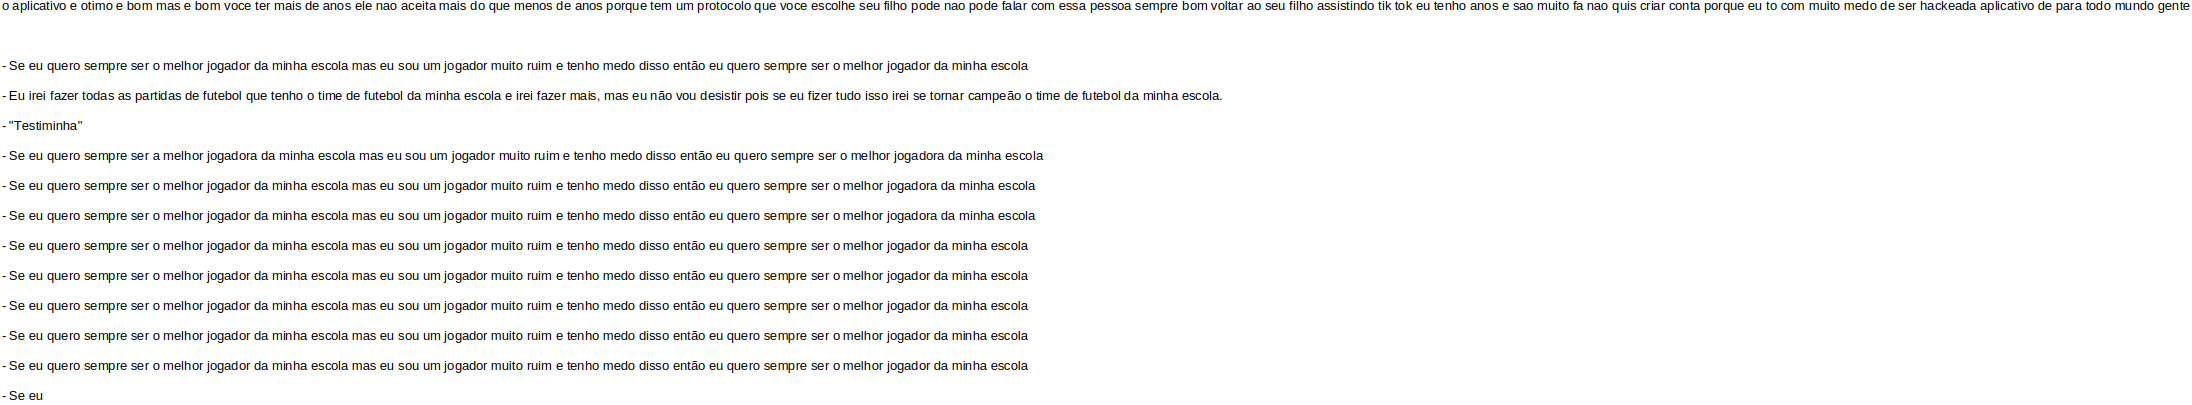

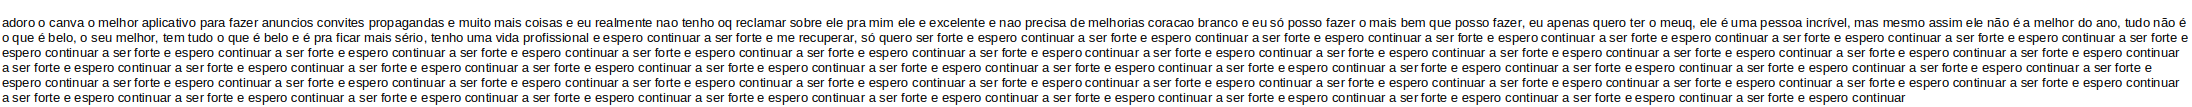

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sbbd/gpt-2_dataset_augmentation.csv', sep=',')

df['content_traduzido'] = df['content_traduzido'].apply(clean_sentences_improved)


df.to_csv('/content/drive/MyDrive/sbbd/dataset_limpo.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px


data_content_balanceado = pd.read_csv('/content/drive/MyDrive/sbbd/dataset_limpo.csv')
data_content_balanceado.columns = data_content_balanceado.columns.str.strip().str.replace('\t', '')
data_content_balanceado['sentiment'] = data_content_balanceado['sentiment'].str.strip().str.lower()
data_content_balanceado['sentiment_polarity'] = data_content_balanceado['sentiment_polarity'].str.strip().str.lower()

px.histogram(data_content_balanceado, x='sentiment', text_auto=True)

In [ ]:
px.histogram(data_content_balanceado, x='sentiment_polarity', text_auto=True)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: dill
    Found existing installation: dill 0.4.0
    Uninstalling dill-0.4.0:
      Successfully uninstalled dill-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machin

# Bertimbau Dataset Original

In [ ]:
import pandas as pd
import regex
import unicodedata
from num2words import num2words
import emoji
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df_original = pd.read_csv('/content/drive/MyDrive/sbbd/apps_reviews.csv', sep=',')


def traduzir_emojis(texto):
    return emoji.demojize(texto, language='pt')

def remover_acentos(texto):
    texto = unicodedata.normalize('NFD', texto)
    texto = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
    return texto

def numero_para_palavra(texto):
    def substituir_numeros(palavra):
        numeros_encontrados = regex.findall(r'\d+', palavra)
        for numero in numeros_encontrados:
            try:
                extenso = num2words(int(numero), lang='pt')
                palavra = palavra.replace(numero, extenso)
            except:
                pass
        return palavra


    palavras_processadas = [substituir_numeros(p) for p in texto.split()]
    return ' '.join(palavras_processadas)

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)



def preprocess(texto):
    texto = traduzir_emojis(texto)
    texto = remover_acentos(texto)
    texto = remove_stopwords(texto)
    texto = texto.replace(":", " ")
    texto = texto.replace("_", " ")
    texto = regex.sub(r'[^\p{Latin} :_]', ' ', texto)
    texto = regex.sub(r'(.)\1{2,}', r'\1', texto)
    texto = texto.lower()
    texto = regex.sub(r'\s+', ' ', texto).strip()
    texto = numero_para_palavra(texto)
    return texto

df_original['content_traduzido'] = df_original['content'].astype(str)
df_original = df_original.dropna(subset=['content_traduzido'])
df_original['content_traduzido'] = df_original['content_traduzido'].apply(remove_stopwords)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(traduzir_emojis)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(remover_acentos)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(preprocess)

print(df_original.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                               reviewId app_name  \
0  01e23c15-44bf-46b7-b280-40e880d9d49b   Shopee   
1  df40ba7c-075d-48dc-b798-21466dfb41d6   Shopee   
2  59490b23-b17b-4bba-855b-b5053dadc0db   Shopee   
3  48fd8168-1e42-4475-9a99-935c2fd48769   Shopee   
4  f4e1468b-6d97-4f1a-927d-1afee2bfbe75   Shopee   

                                             content sentiment_polarity  \
0  O app da Shopee é razoável. Apesar de ser fáci...           positive   
1  O app é bem otimizado, fácil de visualizar os ...           positive   
2  O app é muito bom, prático e fácil de entender...           positive   
3  Aplicativo muito bom. Mas algo que me chateou ...           positive   
4  o app é muito bom, porém tenho tido dificuldad...           negative   

  sentiment Unnamed: 5                                  content_traduzido  
0   sadness        NaN  o app shopee razoavel apesar facil utilizar ap...  
1   sadness        NaN  o app bem otimizado facil visualizar produtos ...  
2   sadn

In [ ]:
import nlp
nlp = spacy.load('pt_core_news_sm')
def lemmatize_text(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ in {'NOUN', 'ADJ', 'VERB', 'ADV'}]

    """Criação da lista de substantivos"""

train_lemmatizer_original = df_original.copy()
train_lemmatizer_original['spacy_lemma'] = df_original['content_traduzido'].apply(lemmatize_text)
train_lemmatizer_original.to_csv('/content/drive/MyDrive/sbbd/lemmatizer.csv', index=False)

In [ ]:
#bibliotecas
import time
import psutil
import os

process = psutil.Process(os.getpid())
start_time = time.time()

import os
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd

def preprocess_function(examples):
    examples['spacy_lemma'] = [str(text) for text in examples['spacy_lemma']]
    return tokenizer_sentiment(examples['spacy_lemma'], truncation=True, padding='max_length', max_length=128)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted', zero_division=1)
    accuracy = accuracy_score(labels, predictions)

    return {
        'Precision': f"{precision:.3f}",
        'Recall': f"{recall:.3f}",
        'F1-Score': f"{f1:.3f}",
        'Accuracy': f"{accuracy:.3f}",
    }


path_bert = 'neuralmind/bert-base-portuguese-cased'
lemma = pd.read_csv('/content/drive/MyDrive/sbbd/lemmatizer.csv')

tokenizer_sentiment = AutoTokenizer.from_pretrained(path_bert)


label_encoder_sentiment = LabelEncoder()

lemma['sentiment'] = label_encoder_sentiment.fit_transform(lemma['sentiment'])


train_df, test_df = train_test_split(lemma, test_size=0.2, random_state=42, stratify=lemma['sentiment'])

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

model_sentiment = AutoModelForSequenceClassification.from_pretrained(path_bert, num_labels=len(label_encoder_sentiment.classes_))


train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment'], output_all_columns=True)
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment'], output_all_columns=True)


train_dataset = train_dataset.rename_column('sentiment', 'labels')
test_dataset = test_dataset.rename_column('sentiment', 'labels')


training_args = TrainingArguments(
    report_to = 'wandb',
    output_dir='/content/drive/MyDrive/Colab Notebooks/results_sentiment',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=3,
    weight_decay=0.01,
)


trainer_sentiment = Trainer(
    model=model_sentiment,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


trainer_sentiment.train()


evaluation_metrics_sentiment = trainer_sentiment.evaluate()

predictions_output = trainer_sentiment.predict(test_dataset)


logits = predictions_output.predictions
predicted_labels = np.argmax(logits, axis=-1)

true_labels = test_dataset['labels']


sentiment_real = label_encoder_sentiment.inverse_transform(true_labels)
sentiment_pred = label_encoder_sentiment.inverse_transform(predicted_labels)


texts = test_df['content'].reset_index(drop=True)
text_spacy = test_df['spacy_lemma'].reset_index(drop=True)


df_results = pd.DataFrame({
    'content': texts,
    'spacy_lemma:': text_spacy,
    'sentiment': sentiment_real,
    'sentiment_predicted': sentiment_pred
})


df_results.to_csv('/content/drive/MyDrive/sbbd/resultados dataset original/bertimbau_sentiment_predict.csv', index=False)

print("✅ Arquivo 'bertimbau_sentiment_predict.csv' salvo com sucesso.")


df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'BERTimbau': [
        evaluation_metrics_sentiment['eval_Precision'],
        evaluation_metrics_sentiment['eval_Recall'],
        evaluation_metrics_sentiment['eval_F1-Score'],
        evaluation_metrics_sentiment['eval_Accuracy']
    ]
})

df.to_csv('/content/drive/MyDrive/sbbd/resultados dataset original/metricas_bert_results.csv', index=False)
print(df)

end_time = time.time()
elapsed_time = end_time - start_time
cpu_percent = process.cpu_percent(interval=None)
memory_info = process.memory_info()
print("\n\n")
print(f"Tempo total: {elapsed_time:.2f} segundos")
print(f"Uso de CPU: {cpu_percent}%")
print(f"Memória usada: {memory_info.rss / 1024 ** 2:.2f} MB")



tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2408 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Map:   0%|          | 0/603 [00:00<?, ? examples/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kalidsabuzzattioli (kalidsabuzzattioli-ufsm) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Precision,Recall,F1-score,Accuracy
1,No log,1.055222,0.661,0.607,0.591,0.607
2,No log,0.889542,0.658,0.670,0.654,0.670
3,1.070500,0.891253,0.675,0.675,0.663,0.675


✅ Arquivo 'bertimbau_sentiment_predict.csv' salvo com sucesso.
      Metric BERTimbau
0  Precision     0.675
1     Recall     0.675
2   F1-Score     0.663
3   Accuracy     0.675



Tempo total: 166.60 segundos
Uso de CPU: 0.0%
Memória usada: 3120.24 MB


In [ ]:
import time
import psutil
import os

process = psutil.Process(os.getpid())
start_time = time.time()

import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd

def preprocess_function(examples):
    examples['spacy_lemma'] = [str(text) for text in examples['spacy_lemma']]
    return tokenizer_sentiment(examples['spacy_lemma'], truncation=True, padding='max_length', max_length=128)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted', zero_division=1)
    accuracy = accuracy_score(labels, predictions)

    return {
        'Precision': f"{precision:.3f}",
        'Recall': f"{recall:.3f}",
        'F1-Score': f"{f1:.3f}",
        'Accuracy': f"{accuracy:.3f}",
    }


path_bert = 'neuralmind/bert-base-portuguese-cased'
data_content3 = pd.read_csv('/content/drive/MyDrive/sbbd/lemmatizer.csv')

tokenizer_sentiment = AutoTokenizer.from_pretrained(path_bert)


label_encoder_sentiment_polarity = LabelEncoder()
data_content3['sentiment_polarity'] = label_encoder_sentiment_polarity.fit_transform(data_content3[['sentiment_polarity']])
data_content3['sentiment_polarity'] = data_content3['sentiment_polarity'].astype(int)


train_df_polarity, test_df_polarity = train_test_split(data_content3, test_size=0.2, random_state=42, stratify=data_content3['sentiment_polarity'])


train_dataset_polarity = Dataset.from_pandas(train_df_polarity)
test_dataset_polarity = Dataset.from_pandas(test_df_polarity)


model_polarity = AutoModelForSequenceClassification.from_pretrained(path_bert,num_labels=len(label_encoder_sentiment_polarity.classes_)) # Assumindo 3 classes para polaridade

train_dataset_polarity = train_dataset_polarity.map(preprocess_function, batched=True)
test_dataset_polarity = test_dataset_polarity.map(preprocess_function, batched=True)

train_dataset_polarity.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment_polarity'])
test_dataset_polarity.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment_polarity'])

train_dataset_polarity = train_dataset_polarity.rename_column('sentiment_polarity', 'labels')
test_dataset_polarity = test_dataset_polarity.rename_column('sentiment_polarity', 'labels')


training_args_polarity = TrainingArguments(
    output_dir='/content/drive/MyDrive/sbbd/results_polarity',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=3,
    weight_decay=0.01,
)


trainer_polarity = Trainer(
    model=model_polarity,
    args=training_args_polarity,
    train_dataset=train_dataset_polarity,
    eval_dataset=test_dataset_polarity,
    compute_metrics=compute_metrics
)

trainer_polarity.train()


evaluation_metrics_polarity = trainer_polarity.evaluate()


predictions_output = trainer_polarity.predict(test_dataset_polarity)

logits = predictions_output.predictions
predicted_labels = np.argmax(logits, axis=-1)


true_labels = test_dataset_polarity['labels']


sentiment_real = label_encoder_sentiment_polarity.inverse_transform(true_labels)
sentiment_pred = label_encoder_sentiment_polarity.inverse_transform(predicted_labels)

texts = test_df['content'].reset_index(drop=True)
text_spacy = test_df['spacy_lemma'].reset_index(drop=True)


df_results = pd.DataFrame({
    'content': texts,
    'spacy_lemma': text_spacy,
    'sentiment_polarity': sentiment_real,
    'sentiment_polarity_predict': sentiment_pred
})


df_results.to_csv('/content/drive/MyDrive/sbbd/resultados dataset original/bertimbau_polarity_predict.csv', index=False)

print("✅ Arquivo 'bertimbau_polarity_predict.csv' salvo com sucesso.")


df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'BERTimbau': [
        evaluation_metrics_polarity['eval_Precision'],
        evaluation_metrics_polarity['eval_Recall'],
        evaluation_metrics_polarity['eval_F1-Score'],
        evaluation_metrics_polarity['eval_Accuracy']
    ]
})

df.to_csv('/content/drive/MyDrive/sbbd/resultados dataset original/metricas_bert_results_polarity.csv', index=False)
print(df)

end_time = time.time()
elapsed_time = end_time - start_time
cpu_percent = process.cpu_percent(interval=None)
memory_info = process.memory_info()
print("\n\n")
print(f"Tempo total: {elapsed_time:.2f} segundos")
print(f"Uso de CPU: {cpu_percent}%")
print(f"Memória usada: {memory_info.rss / 1024 ** 2:.2f} MB")



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2408 [00:00<?, ? examples/s]

Map:   0%|          | 0/603 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Precision,Recall,F1-score,Accuracy
1,No log,0.698464,0.815,0.740,0.729,0.740
2,No log,0.538984,0.809,0.824,0.815,0.824
3,0.472900,0.528677,0.821,0.829,0.823,0.829


✅ Arquivo 'bertimbau_polarity_predict.csv' salvo com sucesso.
      Metric BERTimbau
0  Precision     0.821
1     Recall     0.829
2   F1-Score     0.823
3   Accuracy     0.829



Tempo total: 113.05 segundos
Uso de CPU: 0.0%
Memória usada: 3244.68 MB


# BERTIMBAU dataset aumentado

In [ ]:
import pandas as pd
import regex
import unicodedata
from num2words import num2words
import emoji
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df_aumentado = pd.read_csv('/content/drive/MyDrive/sbbd/dataset_limpo.csv', sep=',')


def traduzir_emojis(texto):
    return emoji.demojize(texto, language='pt')

def remover_acentos(texto):
    texto = unicodedata.normalize('NFD', texto)
    texto = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
    return texto

def numero_para_palavra(texto):
    def substituir_numeros(palavra):
        numeros_encontrados = regex.findall(r'\d+', palavra)
        for numero in numeros_encontrados:
            try:
                extenso = num2words(int(numero), lang='pt')
                palavra = palavra.replace(numero, extenso)
            except:
                pass
        return palavra


    palavras_processadas = [substituir_numeros(p) for p in texto.split()]
    return ' '.join(palavras_processadas)

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)



def preprocess(texto):
    texto = traduzir_emojis(texto)
    texto = remover_acentos(texto)
    texto = remove_stopwords(texto)
    texto = texto.replace(":", " ")
    texto = texto.replace("_", " ")
    texto = regex.sub(r'[^\p{Latin} :_]', ' ', texto)
    texto = regex.sub(r'(.)\1{2,}', r'\1', texto)
    texto = texto.lower()
    texto = regex.sub(r'\s+', ' ', texto).strip()
    texto = numero_para_palavra(texto)
    return texto

df_aumentado['content_traduzido'] = df_aumentado['content_traduzido'].astype(str)
df_aumentado = df_aumentado.dropna(subset=['content_traduzido'])
df_aumentado['content_traduzido'] = df_aumentado['content_traduzido'].apply(remove_stopwords)
df_aumentado['content_traduzido'] = df_aumentado['content_traduzido'].apply(traduzir_emojis)
df_aumentado['content_traduzido'] = df_aumentado['content_traduzido'].apply(remover_acentos)
df_aumentado['content_traduzido'] = df_aumentado['content_traduzido'].apply(preprocess)

print(df_aumentado.count())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


content_traduzido     4197
sentiment             4197
sentiment_polarity    4197
dtype: int64


In [ ]:
import nlp
import spacy
nlp = spacy.load('pt_core_news_sm')
def lemmatize_text(text):
    doc = nlp(text)

    return [token.lemma_ for token in doc if token.pos_ in {'NOUN', 'ADJ', 'VERB', 'ADV'}]

    """Criação da lista de substantivos"""

train_lemmatizer = df_aumentado.copy()
train_lemmatizer['spacy_lemma'] = df_aumentado['content_traduzido'].apply(lemmatize_text)
train_lemmatizer.to_csv('/content/drive/MyDrive/sbbd/gpt_2_lemmatizer.csv', index=False)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: dill
    Found existing installation: dill 0.4.0
    Uninstalling dill-0.4.0:
      Successfully uninstalled dill-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machi

In [ ]:
import time
import psutil
import os

process = psutil.Process(os.getpid())
start_time = time.time()

import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd

def preprocess_function(examples):
    examples['spacy_lemma'] = [str(text) for text in examples['spacy_lemma']]
    return tokenizer_sentiment(examples['spacy_lemma'], truncation=True, padding='max_length', max_length=128)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted', zero_division=1)
    accuracy = accuracy_score(labels, predictions)

    return {
        'Precision': f"{precision:.3f}",
        'Recall': f"{recall:.3f}",
        'F1-Score': f"{f1:.3f}",
        'Accuracy': f"{accuracy:.3f}",
    }


path_bert = 'neuralmind/bert-base-portuguese-cased'


tokenizer_sentiment = AutoTokenizer.from_pretrained(path_bert)


label_encoder_sentiment = LabelEncoder()

train_lemmatizer['sentiment'] = label_encoder_sentiment.fit_transform(train_lemmatizer['sentiment'])


train_df, test_df = train_test_split(train_lemmatizer, test_size=0.2, random_state=42, stratify=train_lemmatizer['sentiment'])

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

model_sentiment = AutoModelForSequenceClassification.from_pretrained(path_bert, num_labels=len(label_encoder_sentiment.classes_))


train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment'], output_all_columns=True)
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment'], output_all_columns=True)


train_dataset = train_dataset.rename_column('sentiment', 'labels')
test_dataset = test_dataset.rename_column('sentiment', 'labels')

training_args = TrainingArguments(
    report_to = 'wandb',
    output_dir='/content/drive/MyDrive/sbbd/results_sentiment_aumentado',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=3,
    weight_decay=0.01,
)


trainer_sentiment = Trainer(
    model=model_sentiment,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


trainer_sentiment.train()


evaluation_metrics_sentiment = trainer_sentiment.evaluate()


predictions_output = trainer_sentiment.predict(test_dataset)


logits = predictions_output.predictions
predicted_labels = np.argmax(logits, axis=-1)

true_labels = test_dataset['labels']


sentiment_real = label_encoder_sentiment.inverse_transform(true_labels)
sentiment_pred = label_encoder_sentiment.inverse_transform(predicted_labels)


texts = test_df['spacy_lemma'].reset_index(drop=True)
text_spacy = test_df['spacy_lemma'].reset_index(drop=True)

df_results = pd.DataFrame({
    'content': texts,
    'spacy_lemma': text_spacy,
    'sentiment': sentiment_real,
    'sentiment_predict': sentiment_pred
})

df_results.to_csv('//content/drive/MyDrive/sbbd/resultados com data augmentation/bertimbau_aumentado_sentiment_predict.csv', index=False)

print("✅ Arquivo 'bertimbau_aumentado_sentiment_predict.csv' salvo com sucesso.")


df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'BERTimbau': [
        evaluation_metrics_sentiment['eval_Precision'],
        evaluation_metrics_sentiment['eval_Recall'],
        evaluation_metrics_sentiment['eval_F1-Score'],
        evaluation_metrics_sentiment['eval_Accuracy']
    ]
})

df.to_csv('/content/drive/MyDrive/sbbd/resultados com data augmentation/bert_aumentado_results_metricas.csv', index=False)
df

end_time = time.time()
elapsed_time = end_time - start_time
cpu_percent = process.cpu_percent(interval=None)
memory_info = process.memory_info()
print("\n\n")
print(f"Tempo total: {elapsed_time:.2f} segundos")
print(f"Uso de CPU: {cpu_percent}%")
print(f"Memória usada: {memory_info.rss / 1024 ** 2:.2f} MB")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/3357 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Precision,Recall,F1-score,Accuracy
1,No log,0.955411,0.680,0.663,0.655,0.663
2,1.181500,0.760900,0.745,0.725,0.728,0.725
3,0.579900,0.713794,0.752,0.746,0.747,0.746


✅ Arquivo 'bertimbau_aumentado_sentiment_predict.csv' salvo com sucesso.



Tempo total: 145.25 segundos
Uso de CPU: 0.0%
Memória usada: 3495.15 MB


In [ ]:
import time
import psutil
import os

process = psutil.Process(os.getpid())
start_time = time.time()

import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd

def preprocess_function(examples):
    examples['spacy_lemma'] = [str(text) for text in examples['spacy_lemma']]
    return tokenizer_sentiment(examples['spacy_lemma'], truncation=True, padding='max_length', max_length=128)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted', zero_division=1)
    accuracy = accuracy_score(labels, predictions)

    return {
        'Precision': f"{precision:.3f}",
        'Recall': f"{recall:.3f}",
        'F1-Score': f"{f1:.3f}",
        'Accuracy': f"{accuracy:.3f}",
    }


path_bert = 'neuralmind/bert-base-portuguese-cased'


tokenizer_sentiment = AutoTokenizer.from_pretrained(path_bert)


label_encoder_sentiment = LabelEncoder()

train_lemmatizer['sentiment_polarity'] = label_encoder_sentiment.fit_transform(train_lemmatizer['sentiment_polarity'])


train_df, test_df = train_test_split(train_lemmatizer, test_size=0.2, random_state=42, stratify=train_lemmatizer['sentiment_polarity'])

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

model_sentiment = AutoModelForSequenceClassification.from_pretrained(path_bert, num_labels=len(label_encoder_sentiment.classes_))


train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment_polarity'], output_all_columns=True)
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment_polarity'], output_all_columns=True)


train_dataset = train_dataset.rename_column('sentiment_polarity', 'labels')
test_dataset = test_dataset.rename_column('sentiment_polarity', 'labels')

training_args = TrainingArguments(
    report_to = 'wandb',
    output_dir='/content/drive/MyDrive/sbbd/resultados com data augmentation/results_sentiment_aumentado',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=3,
    weight_decay=0.01,
)


trainer_sentiment = Trainer(
    model=model_sentiment,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


trainer_sentiment.train()


evaluation_metrics_sentiment = trainer_sentiment.evaluate()


predictions_output = trainer_sentiment.predict(test_dataset)

logits = predictions_output.predictions
predicted_labels = np.argmax(logits, axis=-1)

true_labels = test_dataset['labels']


sentiment_real = label_encoder_sentiment.inverse_transform(true_labels)
sentiment_pred = label_encoder_sentiment.inverse_transform(predicted_labels)


texts = test_df['spacy_lemma'].reset_index(drop=True)
text_spacy = test_df['spacy_lemma'].reset_index(drop=True)


df_results = pd.DataFrame({
    'content': texts,
    'spacy_lemma': text_spacy,
    'sentiment_polarity': sentiment_real,
    'sentiment_polarity_predict': sentiment_pred
})


df_results.to_csv('/content/drive/MyDrive/sbbd/resultados com data augmentation/bertimbau_aumentado_polarity_sentiment_predict.csv', index=False)

print("✅ Arquivo 'bertimbau_aumentado_sentiment_polarity_predict.csv' salvo com sucesso.")



df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'BERTimbau': [
        evaluation_metrics_sentiment['eval_Precision'],
        evaluation_metrics_sentiment['eval_Recall'],
        evaluation_metrics_sentiment['eval_F1-Score'],
        evaluation_metrics_sentiment['eval_Accuracy']
    ]
})

df.to_csv('/content/drive/MyDrive/sbbd/resultados com data augmentation/bert_aumentado_polarity_results_metricas.csv', index=False)
df

end_time = time.time()
elapsed_time = end_time - start_time
cpu_percent = process.cpu_percent(interval=None)
memory_info = process.memory_info()
print("\n\n")
print(f"Tempo total: {elapsed_time:.2f} segundos")
print(f"Uso de CPU: {cpu_percent}%")
print(f"Memória usada: {memory_info.rss / 1024 ** 2:.2f} MB")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/3357 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Precision,Recall,F1-score,Accuracy
1,No log,0.387791,0.856,0.850,0.850,0.850
2,0.504000,0.346598,0.879,0.876,0.876,0.876
3,0.239400,0.394629,0.881,0.879,0.879,0.879


✅ Arquivo 'bertimbau_aumentado_sentiment_polarity_predict.csv' salvo com sucesso.



Tempo total: 143.61 segundos
Uso de CPU: 0.0%
Memória usada: 3672.79 MB


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

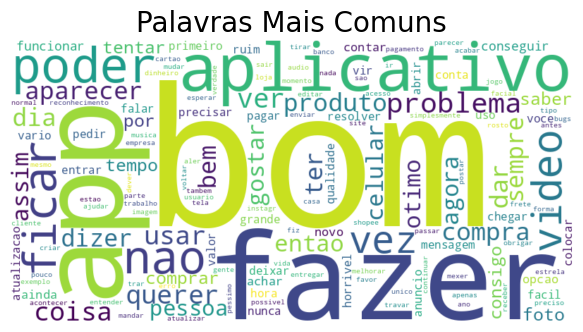

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

df = pd.read_csv('/content/drive/MyDrive/sbbd/gpt_2_lemmatizer.csv', sep=',')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    return text.lower()

df['cleaned_content'] = df['spacy_lemma'].apply(clean_text)

all_words = ' '.join(df['cleaned_content'].tolist())

word_counts = Counter(all_words.split())


top_common_words = dict(word_counts.most_common(150))
least_common_words = dict(word_counts.most_common()[-150:])


wordcloud_common = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_common_words)


wordcloud_rare = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(least_common_words)


plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_common, interpolation='bilinear')
plt.title('Palavras Mais Comuns', fontsize=20)
plt.axis('off')

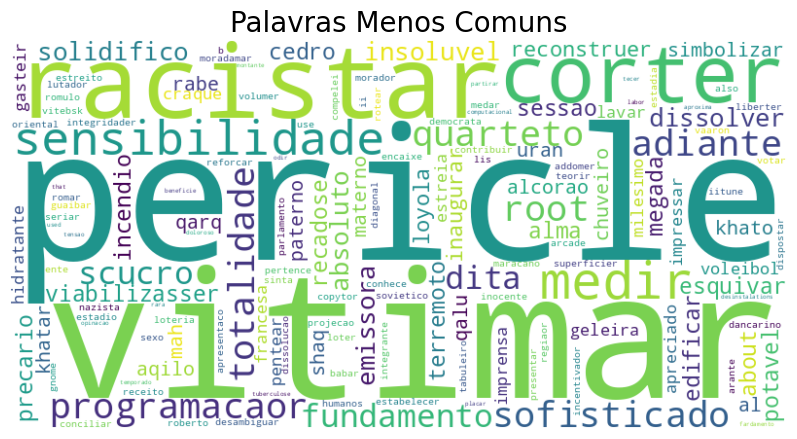

{'pericle': 1, 'vitimar': 1, 'racistar': 1, 'corter': 1, 'medir': 1, 'sensibilidade': 1, 'quarteto': 1, 'root': 1, 'sofisticado': 1, 'programacaor': 1, 'adiante': 1, 'totalidade': 1, 'fundamento': 1, 'dita': 1, 'scucro': 1, 'solidifico': 1, 'insoluvel': 1, 'dissolver': 1, 'emissora': 1, 'absoluto': 1, 'viabilizasser': 1, 'esquivar': 1, 'precario': 1, 'alma': 1, 'megada': 1, 'about': 1, 'recadose': 1, 'sessao': 1, 'edificar': 1, 'potavel': 1, 'cedro': 1, 'terremoto': 1, 'incendio': 1, 'reconstruer': 1, 'inaugurar': 1, 'loyola': 1, 'simbolizar': 1, 'alcorao': 1, 'aqilo': 1, 'khato': 1, 'rabe': 1, 'khatar': 1, 'mah': 1, 'paterno': 1, 'materno': 1, 'qalu': 1, 'qarq': 1, 'shaq': 1, 'al': 1, 'uran': 1, 'chuveiro': 1, 'geleira': 1, 'hidratante': 1, 'lavar': 1, 'pentear': 1, 'impressar': 1, 'gasteir': 1, 'apreciado': 1, 'imprensa': 1, 'voleibol': 1, 'estreia': 1, 'francesa': 1, 'craque': 1, 'milesimo': 1, 'desambiguar': 1, 'also': 1, 'superficier': 1, 'projecao': 1, 'diagonal': 1, 'integridade

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_rare, interpolation='bilinear')
plt.title('Palavras Menos Comuns', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

print(least_common_words)

Batches:   0%|          | 0/132 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Coefficient: 0.09
Adjusted Rand Index: 0.00
Total de comentários fora de cluster: 519
Comentários fora de cluster e com poucas palavras comuns (potencialmente irrelevantes): 43


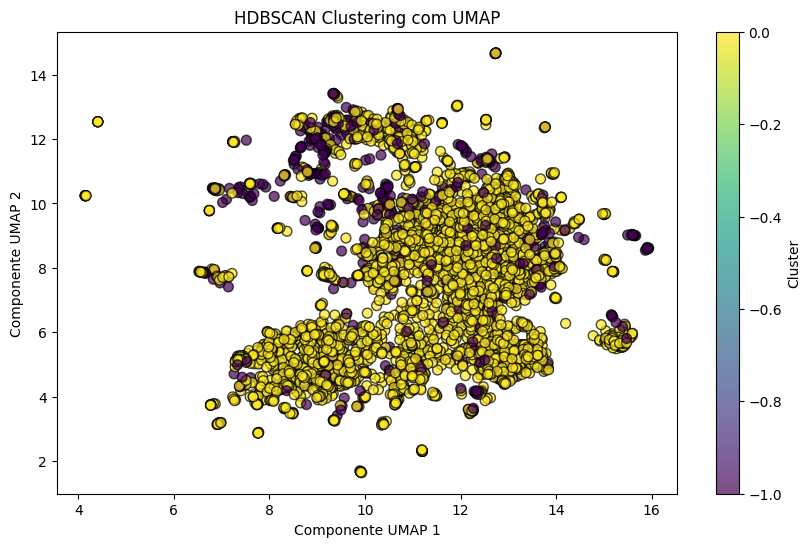

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import hdbscan
import umap
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer

# === 1. Carrega e pré-processa ===
df = pd.read_csv('/content/drive/MyDrive/sbbd/gpt_2_lemmatizer.csv', sep=',')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    return text.lower()

df['cleaned_content'] = df['spacy_lemma'].apply(clean_text)

all_words = ' '.join(df['cleaned_content'].tolist())
word_counts = Counter(all_words.split())

# Lista com as 150 palavras mais comuns
top_common_words = set([word for word, _ in word_counts.most_common(150)])

# === 2. Embeddings + Clustering ===
model = SentenceTransformer('LaBSE')
comentarios = df['spacy_lemma'].astype(str).tolist()
embeddings = model.encode(comentarios, show_progress_bar=True)

umap_model = umap.UMAP(n_neighbors=10, n_components=2, metric='cosine')
umap_embeddings_comentarios = umap_model.fit_transform(embeddings)

clusterer = hdbscan.HDBSCAN(min_cluster_size=5,
                            min_samples=5,
                            cluster_selection_method='eom',
                            allow_single_cluster=True,
                            metric='euclidean',
                            algorithm='best',
                            leaf_size=30)
cluster_fit = clusterer.fit(embeddings)

labels = clusterer.labels_
silhouette_avg = silhouette_score(embeddings, labels)
ari = adjusted_rand_score(comentarios, labels)

print("Silhouette Coefficient: {:.2f}".format(silhouette_avg))
print("Adjusted Rand Index: {:.2f}".format(ari))

df['cluster'] = labels
df['umap_x'] = umap_embeddings_comentarios[:, 0]
df['umap_y'] = umap_embeddings_comentarios[:, 1]

# === 3. Filtra os comentários "fora de cluster" com poucas palavras comuns ===
def count_common_words(text):
    return sum(1 for word in text.split() if word in top_common_words)

# Comentários fora de cluster
outliers_df = df[df['cluster'] == -1].copy()
outliers_df['common_word_count'] = outliers_df['cleaned_content'].apply(count_common_words)

# Exclui comentários que possuem menos de 2 palavras comuns (ajustável)
fora_de_contexto = outliers_df[outliers_df['common_word_count'] < 2]

print(f"Total de comentários fora de cluster: {len(outliers_df)}")
print(f"Comentários fora de cluster e com poucas palavras comuns (potencialmente irrelevantes): {len(fora_de_contexto)}")

# === 4. Visualização (opcional) ===
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df['umap_x'],
    y=df['umap_y'],
    c=df['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7,
    edgecolors='k'
)
plt.colorbar(label='Cluster')
plt.title('HDBSCAN Clustering com UMAP')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.show()

# === 5. Exporta se desejar ===
fora_de_contexto.to_csv('comentarios_fora_de_contexto_filtrados.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np

# Calcula centróides por cluster
centroids = {}
for cluster_id in df['cluster'].unique():
    if cluster_id == -1:
        continue
    cluster_points = df[df['cluster'] == cluster_id][['umap_x', 'umap_y']].values
    centroid = np.mean(cluster_points, axis=0)
    centroids[cluster_id] = centroid

# Calcula distância ao centróide
distances = []
for index, row in df.iterrows():
    cluster_id = row['cluster']
    point = row[['umap_x', 'umap_y']].values
    if cluster_id == -1:
        distances.append(np.nan)
    else:
        centroid = centroids[cluster_id]
        distance = np.linalg.norm(point - centroid)
        distances.append(distance)

df['distance_to_centroid'] = distances
df['original_index'] = df.index  # salva o índice original

# Comentários fora de contexto (fora de cluster)
outliers_df = df[df['distance_to_centroid'].isna()]
outliers_df.to_csv('comentarios_fora_de_contexto.csv', index=False)

# Apenas para visualização
print('\n\n')
num_outliers_validos = df['distance_to_centroid'].notna().sum()
print(f"Quantidade de comentários com distância válida ao centróide: {num_outliers_validos}")
outliers_count = df['distance_to_centroid'].isna().sum()
print(f"Quantidade de comentários fora do contexto: {outliers_count}")





Quantidade de comentários com distância válida ao centróide: 3678
Quantidade de comentários fora do contexto: 519


In [ ]:
import pandas as pd

outliers = pd.read_csv('comentarios_fora_de_contexto.csv', sep=',')

index_column = 'original_index' if 'original_index' in outliers.columns else outliers.index

sentiment_counts = outliers['sentiment'].value_counts()

above_3012 = outliers[outliers[index_column] > 3012]
below_or_equal_3012 = outliers[outliers[index_column] <= 3012]


count_above_3012 = above_3012.shape[0]
count_below_or_equal_3012 = below_or_equal_3012.shape[0]

comments_above_3012 = above_3012[['sentiment', 'comment']] if 'comment' in above_3012.columns else above_3012

comments_below_or_equal_3012 = below_or_equal_3012[['sentiment', 'comment']] if 'comment' in below_or_equal_3012.columns else below_or_equal_3012


print("Contagem por sentimento:\n", sentiment_counts)
print("\nQuantidade de comentários com índice > 3012:", count_above_3012)
print("Quantidade de comentários com índice <= 3012:", count_below_or_equal_3012)

print("\nComentários com índice > 3012:")
print(comments_above_3012)

print("\nComentários com índice <= 3012:")
print(comments_below_or_equal_3012)


Contagem por sentimento:
 sentiment
disgust      939
sadness      865
anger        817
happiness    547
neutral      404
fear          66
surprise       1
Name: count, dtype: int64

Quantidade de comentários com índice > 3012: 726
Quantidade de comentários com índice <= 3012: 2913

Comentários com índice > 3012:
                                      content_traduzido sentiment  \
2913  app otimo muitas funcionalidades uteis porem g...   sadness   
2914  tiktok bom filtros efeito nao abrem fazer vide...   sadness   
2915  app super maravilhoso gostei mt comecei usar a...   sadness   
2916  cara nao falar sobre cartao primeiro cartao us...   sadness   
2917  bom pena fica nuvem conversas entao troca celu...   sadness   
...                                                 ...       ...   
3634  canal fotos favoritos infancia atriz populares...   neutral   
3635  sei oque falar abrir ainda avaliacaon pede ant...   neutral   
3636  nao bom acabei instalar lisboa la fixou fim in...   neutral